# **프로젝트 목표**
1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델 생성
2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성
3. WEAT score 계산 및 시각화

In [4]:
!sudo apt update -q
!sudo apt install openjdk-17-jdk -y -q
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc

!pip install konlpy -q

Hit:1 http://security.ubuntu.com/ubuntu noble-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu noble InRelease
Hit:3 http://archive.ubuntu.com/ubuntu noble-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu noble-backports InRelease
Reading package lists...
Building dependency tree...
Reading state information...
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
openjdk-17-jdk is already the newest version (17.0.16+8~us1-0ubuntu1~24.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [5]:
!pip install gensim -q

In [6]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.6.0
4.3.3
1.7.0
0.13.2


In [7]:
import os

data_dir = os.path.join(os.getenv("HOME"), "work/weat/data")
file_name = os.path.join(data_dir, "synopsis.txt")

with open(file_name, 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [8]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt

okt = Okt()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

In [9]:
print(len(tokenized))

71156


In [10]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])

[('작품', 0.8927092552185059),
 ('다큐멘터리', 0.8386680483818054),
 ('드라마', 0.8300871253013611),
 ('영화로', 0.8136197924613953),
 ('주제', 0.7911580204963684),
 ('소재', 0.7898991107940674),
 ('스토리', 0.7882735133171082),
 ('코미디', 0.782689094543457),
 ('형식', 0.7788287997245789),
 ('설정', 0.7720649838447571)]

In [11]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)


In [12]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다.
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [14]:
skipgram_model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=1)
skipgram_model.wv.most_similar(positive=['영화'])

[('영화로', 0.7691299319267273),
 ('형식', 0.708060622215271),
 ('주제', 0.699751079082489),
 ('픽션', 0.6967243552207947),
 ('다큐멘터리', 0.6966522932052612),
 ('설정', 0.6927862167358398),
 ('극영화', 0.6925966143608093),
 ('작품', 0.692084014415741),
 ('편의', 0.6904538869857788),
 ('자전', 0.6900028586387634)]

In [15]:
skipgram_model.wv.most_similar(positive=['사랑'])

[('삼각관계', 0.6928970217704773),
 ('진심', 0.6752671003341675),
 ('타이밍', 0.6738632917404175),
 ('마르코', 0.6724573969841003),
 ('해피엔딩', 0.6699191927909851),
 ('존경심', 0.6697881817817688),
 ('차이점', 0.6606822609901428),
 ('짊어지', 0.6595255732536316),
 ('고하', 0.6591448187828064),
 ('만인', 0.6579807996749878)]

In [16]:
#tf-idf
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

In [17]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다.
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다.

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 시간, 다시, 아들, 소녀, 아내, 다른, 영화제, 사이, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 아빠, 생활, 통해, 모습, 기억, 죽음, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 결혼, 사고, 전쟁, 위기, 때문, 이제, 최고, 이자, 과거, 일상, 경찰, 간다, 상황, 미국, 운명, 결심, 관계, 현실, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 만난, 감정, 처음, 국제, 누구, 살인, 충격, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 의도, 동생, 하루, 위기, 계획, 정체, 한국, 

In [18]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [19]:
print(target_art)

['아빠', '음악', '운명', '결심', '지금', '여인', '이름', '이후', '준비', '만난', '감정', '처음', '누구', '충격', '그린']


In [20]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [21]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [22]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [24]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 국제, 마을, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 프롤, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 아이, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 사람, 운명, 최고, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 태구, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 시

## - 중복되지만 주제와 관련이 적은 단어들은 불용어 처리
## - 각 장르별 키워드 추가

In [25]:
# 기본적인 불용어만 처리
korean_stopwords = {
    '자신', '위해', '시작', '그녀', '과연', '이야기', '그들', '그것', '이것',
    '하지만', '그런데', '그리고', '때문', '통해', '함께', '다시', '바로',
    '정말', '아주', '매우', '조금', '많이', '잘', '못', '안', '좀'
}

# 각 장르의 핵심 키워드 (시드)
genre_seeds = {
    'SF': ['우주', '로봇', '미래', '외계인', '과학', '인공지능'],
    '가족': ['가족', '엄마', '아빠', '아버지', '어머니', '아들', '딸'],
    '공연': ['오페라', '발레', '콘서트', '무대', '공연', '음악'],
    '공포': ['귀신', '좀비', '악령', '공포', '유령'],
    '기타': ['영화제', '국제', '단편', '페스티벌'],
    '다큐멘터리': ['다큐', '현실', '기록', '진실'],
    '드라마': ['인생', '갈등', '감정', '관계'],
    '멜로로맨스': ['사랑', '연애', '로맨스', '연인'],
    '뮤지컬': ['뮤지컬', '노래', '음악', '무대'],
    '미스터리': ['미스터리', '수수께끼', '탐정', '사건'],
    '범죄': ['범죄', '살인', '경찰', '형사'],
    '사극': ['조선', '왕', '궁궐', '역사'],
    '서부극': ['서부', '카우보이', '보안관', '무법자'],
    '성인물': ['성인', '섹스', '에로'],
    '스릴러': ['스릴러', '긴장', '추격', '위험'],
    '애니메이션': ['애니메이션', '만화', '캐릭터'],
    '액션': ['액션', '격투', '전투', '총격'],
    '어드벤처': ['모험', '탐험', '여행'],
    '전쟁': ['전쟁', '전투', '군대', '병사'],
    '코미디': ['코미디', '웃음', '유머', '재미'],
    '판타지': ['마법', '요괴', '드래곤', '마녀']
}

# 간단한 키워드 추출
m = [X[i].tocoo() for i in range(X.shape[0])]
w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

attributes = []
feature_names = vectorizer.get_feature_names_out()

for i in range(len(w)):
    genre = genre_name[i]
    print(f'{genre}: ', end='')
    
    attr = []
    
    # 1단계: 시드 키워드 우선 추가
    if genre in genre_seeds:
        for seed in genre_seeds[genre]:
            if (len(attr) < 6 and 
                seed in feature_names and 
                seed in model.wv):
                attr.append(seed)
                print(f'{seed}', end=', ')
    
    # 2단계: TF-IDF 높은 순으로 추가
    j = 0
    while len(attr) < 15 and j < len(w[i]):
        word = feature_names[w[i][j][0]]
        if (word not in attr and
            word not in korean_stopwords and
            len(word) > 1 and
            word in model.wv):
            attr.append(word)
            print(f'{word}', end=', ')
        j += 1
    
    attributes.append(attr)
    print()

print(f"\n총 {len(genre_name)}개 장르 완료")

SF: 우주, 로봇, 미래, 외계인, 과학, 지구, 사람, 인류, 인간, 세계, 모든, 박사, 우주선, 외계, 존재, 
가족: 가족, 엄마, 아빠, 아버지, 어머니, 아들, 영화제, 친구, 아주르, 국제, 마을, 낙타, 할머니, 씨제이, 동구, 
공연: 오페라, 발레, 콘서트, 무대, 공연, 음악, 사랑, 토스카, 실황, 올레, 카바, 오텔로, 리골레토, 백작, 프레, 
공포(호러): 사람, 친구, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 영화, 사실, 소녀, 하나, 
기타: 영화제, 국제, 단편, 페스티벌, 서울, 영화, 사람, 남자, 사랑, 뉴미디어, 여자, 대한, 독립, 친구, 작품, 
다큐멘터리: 다큐, 현실, 기록, 진실, 영화제, 영화, 국제, 다큐멘터리, 사람, 대한, 감독, 서울, 우리, 세계, 여성, 
드라마: 인생, 갈등, 감정, 관계, 영화제, 사람, 사랑, 영화, 국제, 남자, 친구, 엄마, 여자, 아버지, 가족, 
멜로로맨스: 사랑, 연애, 로맨스, 연인, 남편, 남자, 여자, 사람, 친구, 섹스, 마음, 결혼, 서로, 아내, 관계, 
뮤지컬: 뮤지컬, 노래, 음악, 무대, 사랑, 에스메랄다, 충무로, 모차르트, 영화, 토스카, 니웨, 카바, 영화제, 바흐, 프롤, 
미스터리: 미스터리, 수수께끼, 탐정, 사건, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 아이, 남자, 
범죄: 범죄, 살인, 경찰, 형사, 사건, 조직, 사람, 마약, 남자, 모든, 살해, 수사, 발견, 한길수, 범인, 
사극: 조선, 궁궐, 역사, 신기전, 사랑, 아가멤논, 황제, 루안, 사람, 운명, 최고, 하선, 전쟁, 윤서, 트로이, 
서부극(웨스턴): 서부, 보안관, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 개릿, 아이, 무법자, 프린트, 태구, 마적, 현상금, 분노, 
성인물(에로): 남편, 마사지, 섹스, 관계, 영화, 정사, 남자, 여자, 유부녀, 마음, 사랑, 에피소드, 그린, 아내, 자위, 
스릴러: 스릴

### WEAT score 계산

In [26]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [27]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

In [28]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [29]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [30]:
duplicate_weat = []
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])
        duplicate_weat.append(matrix[i][j])

SF 가족 -0.6627859
SF 공연 -0.18420976
SF 공포(호러) -0.66314733
SF 기타 0.19710326
SF 다큐멘터리 0.4455185
SF 드라마 -0.5508091
SF 멜로로맨스 -0.7767634
SF 뮤지컬 0.09983805
SF 미스터리 -0.7074801
SF 범죄 -0.2950869
SF 사극 -0.64115196
SF 서부극(웨스턴) -0.5549636
SF 성인물(에로) -0.59288704
SF 스릴러 -0.5715975
SF 애니메이션 0.215086
SF 액션 -0.5057709
SF 어드벤처 -0.8808384
SF 전쟁 0.014886805
SF 코미디 -0.3133794
SF 판타지 -0.21336222
가족 공연 0.38731658
가족 공포(호러) 0.15264063
가족 기타 0.7897951
가족 다큐멘터리 0.8503814
가족 드라마 0.24007103
가족 멜로로맨스 -0.4800372
가족 뮤지컬 0.65563184
가족 미스터리 -0.116474494
가족 범죄 0.35650232
가족 사극 0.3741375
가족 서부극(웨스턴) 0.58950764
가족 성인물(에로) -0.19244497
가족 스릴러 0.06504283
가족 애니메이션 0.89062893
가족 액션 0.38675955
가족 어드벤처 0.12736607
가족 전쟁 0.6635208
가족 코미디 0.5845245
가족 판타지 0.6888903
공연 공포(호러) -0.2398945
공연 기타 0.86374635
공연 다큐멘터리 0.818857
공연 드라마 -0.30965057
공연 멜로로맨스 -0.6277103
공연 뮤지컬 1.0324174
공연 미스터리 -0.33975556
공연 범죄 -0.05433833
공연 사극 -0.205198
공연 서부극(웨스턴) -0.17725433
공연 성인물(에로) -0.48912603
공연 스릴러 -0.24049214
공연 애니메이션 0.72799706
공연 액션 -0.11213381
공

### 시각화

In [31]:
import matplotlib.pyplot as plt

In [32]:
! sudo apt-get update -qq
! sudo apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-nanum.
(Reading database ... 68201 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.15.0-1.1ubuntu2) ...


<Axes: >

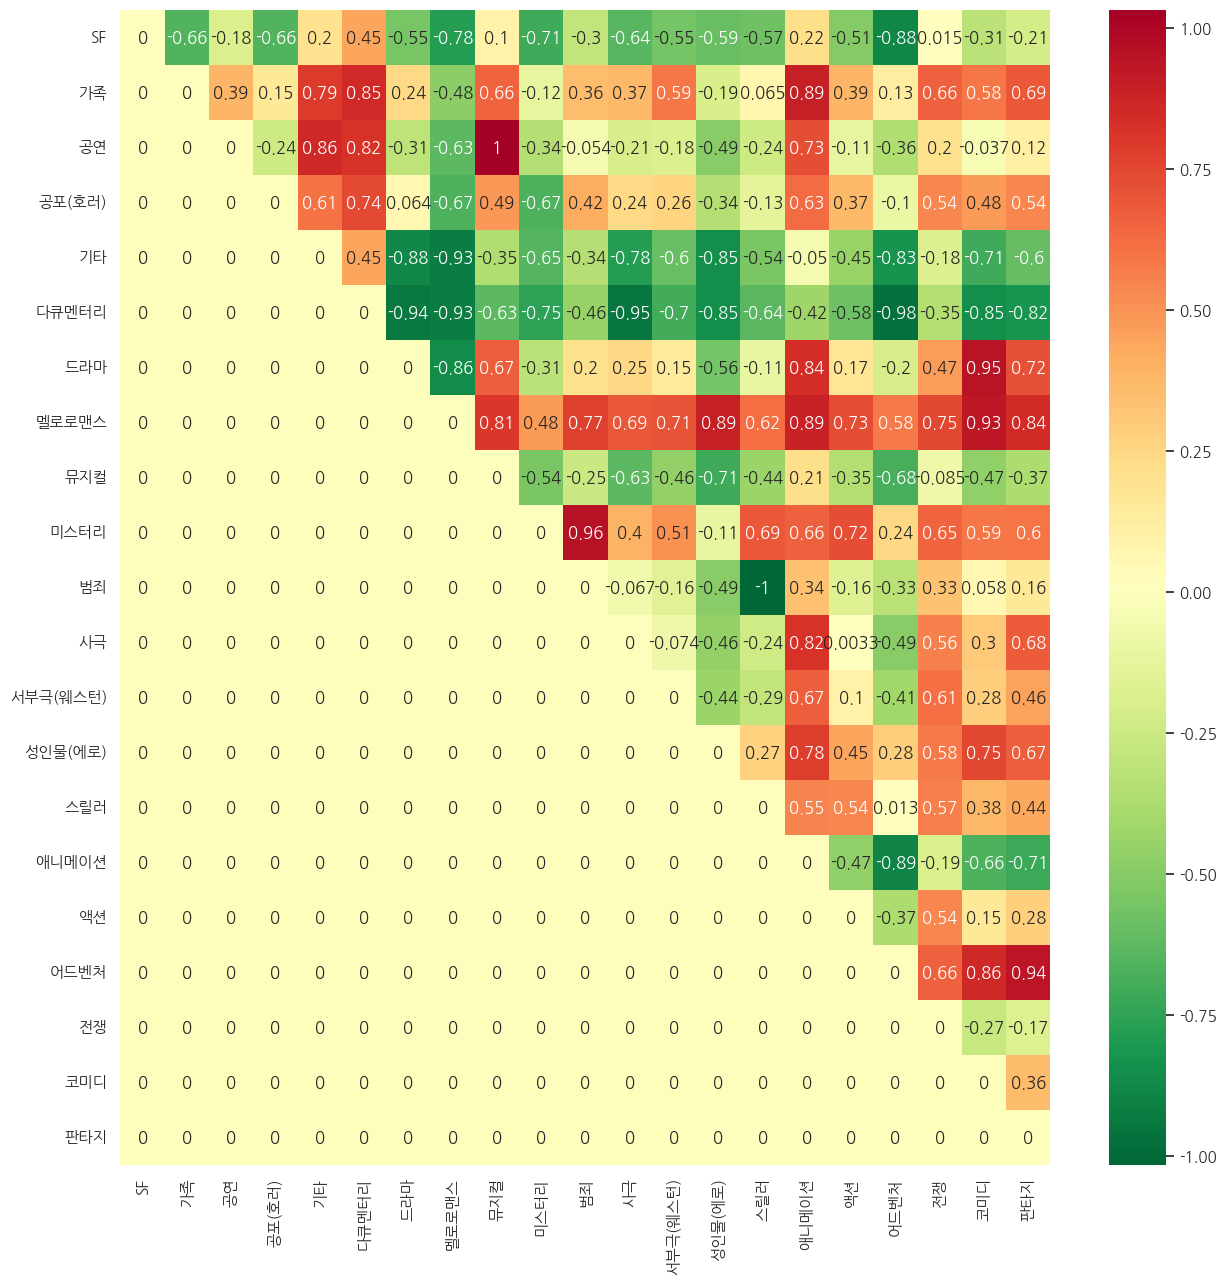

In [33]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r', )
ax.figure.set_size_inches(15, 15) # heatmap 사이즈 잘 보이도록 조절
ax

=== 영화 장르별 예술/일반 편향성 WEAT 분석 ===

          SF: +0.0380 (예술영화 편향) [키워드:10개]
          가족: +0.0764 (예술영화 편향) [키워드:10개]
          공연: -0.0915 (상업영화 편향) [키워드:10개]
          공포: +0.0618 (예술영화 편향) [키워드:10개]
          기타: -0.0245 (상업영화 편향) [키워드:9개]
       다큐멘터리: +0.0602 (예술영화 편향) [키워드:10개]
         드라마: +0.1500 (예술영화 편향) [키워드:10개]
       멜로로맨스: +0.0070 (예술영화 편향) [키워드:10개]
         뮤지컬: -0.0466 (상업영화 편향) [키워드:10개]
        미스터리: +0.0072 (예술영화 편향) [키워드:10개]
          범죄: -0.1037 (상업영화 편향) [키워드:10개]
          사극: -0.0463 (상업영화 편향) [키워드:10개]
         서부극: -0.0735 (상업영화 편향) [키워드:9개]
         성인물: +0.0569 (예술영화 편향) [키워드:8개]
         스릴러: +0.0009 (예술영화 편향) [키워드:10개]
       애니메이션: -0.0413 (상업영화 편향) [키워드:10개]
          액션: -0.0748 (상업영화 편향) [키워드:8개]
        어드벤처: -0.0144 (상업영화 편향) [키워드:10개]
          전쟁: -0.0717 (상업영화 편향) [키워드:10개]
         코미디: +0.0416 (예술영화 편향) [키워드:9개]
         판타지: +0.0208 (예술영화 편향) [키워드:10개]


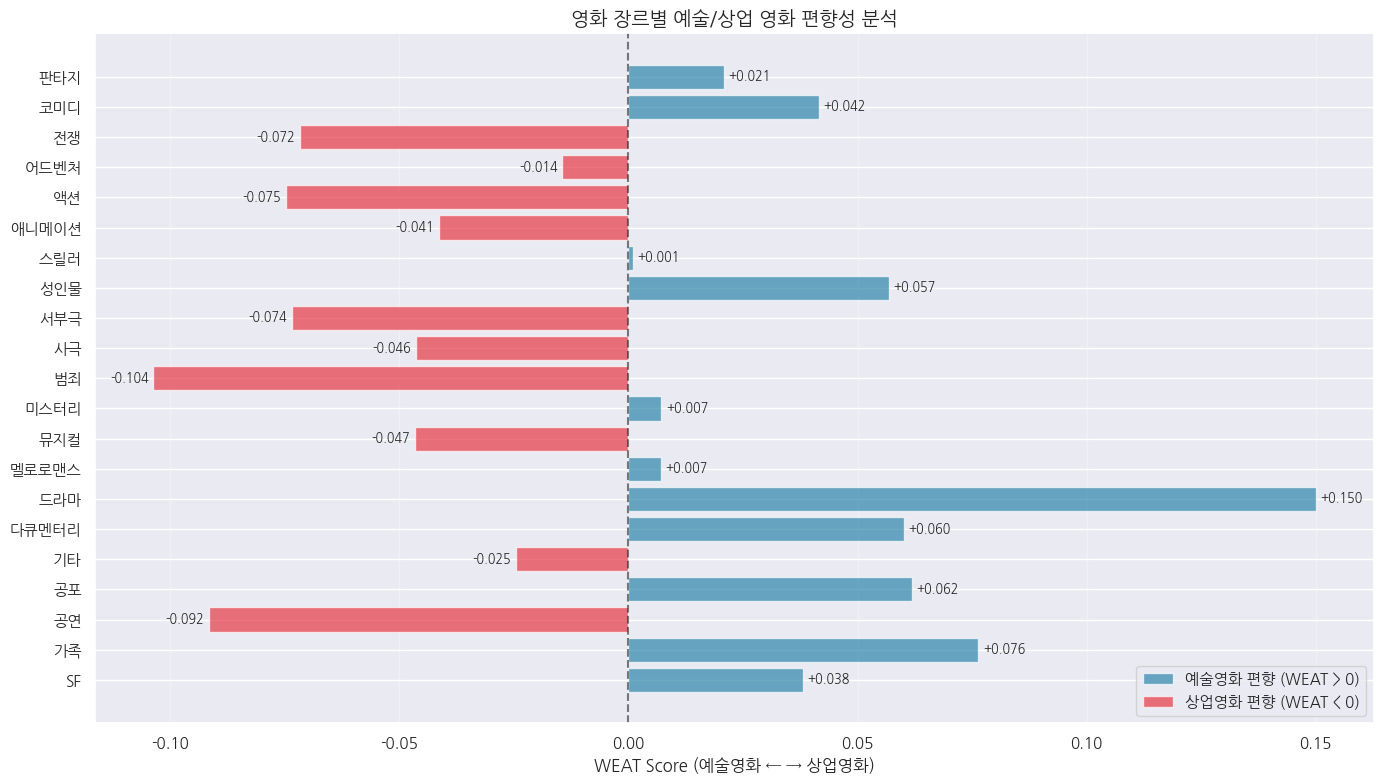


=== 결과 요약 ===
가장 예술영화 편향: 드라마 (+0.1500)
가장 상업영화 편향: 범죄 (-0.1037)
평균 WEAT 점수: -0.0032

예술영화 편향 순위:
  1. 드라마: +0.1500
  2. 가족: +0.0764
  3. 공포: +0.0618
  4. 다큐멘터리: +0.0602
  5. 성인물: +0.0569

상업영화 편향 순위:
  1. 범죄: -0.1037
  2. 공연: -0.0915
  3. 액션: -0.0748
  4. 서부극: -0.0735
  5. 전쟁: -0.0717


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 예술/일반 영화 키워드 정의
art_film_words = [
    '예술', '작품', '실험', '독립', '아방가르드', '철학', '사유', '성찰', 
    '미학', '상징', '은유', '깊이', '의미', '해석', '비판', '사회',
    '인문학', '문학', '시', '순수', '창작', '영상미', '몽타주'
]

commercial_film_words = [
    '흥행', '박스오피스', '관객', '재미', '오락', '스펙터클', '액션', 
    '로맨스', '코미디', '대중', '상업', '할리우드', '블록버스터',
    '스타', '캐스팅', '마케팅', '수익', '티켓', '극장', '인기', '히트'
]

def get_word_embeddings(words, model):
    """단어들의 임베딩 벡터 추출"""
    embeddings = []
    valid_words = []
    
    for word in words:
        if word in model.wv:
            embeddings.append(model.wv[word])
            valid_words.append(word)
    
    if embeddings:
        return np.array(embeddings), valid_words
    else:
        return None, []

def calculate_weat_score(target_words, art_words, commercial_words, model):
    """WEAT 스코어 계산"""
    
    # 임베딩 추출
    target_emb, target_valid = get_word_embeddings(target_words, model)
    art_emb, art_valid = get_word_embeddings(art_words, model)
    commercial_emb, commercial_valid = get_word_embeddings(commercial_words, model)
    
    if target_emb is None or art_emb is None or commercial_emb is None:
        return 0.0, 0, 0, 0
    
    if len(target_emb) == 0 or len(art_emb) == 0 or len(commercial_emb) == 0:
        return 0.0, len(target_valid), len(art_valid), len(commercial_valid)
    
    # 각 타겟 단어에 대해 예술/상업 영화와의 평균 코사인 유사도 계산
    weat_scores = []
    
    for target_vec in target_emb:
        # 예술 영화 단어들과의 평균 유사도
        art_similarities = cosine_similarity([target_vec], art_emb)[0]
        art_mean_sim = np.mean(art_similarities)
        
        # 상업 영화 단어들과의 평균 유사도  
        commercial_similarities = cosine_similarity([target_vec], commercial_emb)[0]
        commercial_mean_sim = np.mean(commercial_similarities)
        
        # WEAT 점수 = 예술영화 유사도 - 상업영화 유사도
        weat_score = art_mean_sim - commercial_mean_sim
        weat_scores.append(weat_score)
    
    # 전체 WEAT 점수는 개별 점수들의 평균
    final_weat = np.mean(weat_scores)
    
    return final_weat, len(target_valid), len(art_valid), len(commercial_valid)

# 장르별 키워드 (앞서 추출한 결과 사용)
genre_keywords = {
    'SF': ['우주', '로봇', '미래', '외계인', '과학', '기술', '지구', '인간', '인류', '박사'],
    '가족': ['가족', '엄마', '아빠', '아버지', '어머니', '아들', '딸', '할머니', '학교', '소년'],
    '공연': ['오페라', '발레', '콘서트', '무대', '공연', '음악', '실황', '토스카', '왕자', '도시'],
    '공포': ['귀신', '좀비', '악령', '공포', '유령', '괴물', '무덤', '저주', '살인마', '악마'],
    '기타': ['영화제', '국제', '단편', '페스티벌', '실험', '독립', '아트하우스', '전시', '작가', '비디오'],
    '다큐멘터리': ['다큐', '현실', '기록', '진실', '취재', '인터뷰', '증언', '실화', '사실', '보고서'],
    '드라마': ['인생', '갈등', '감정', '관계', '성장', '선택', '운명', '치유', '희망', '현실'],
    '멜로로맨스': ['사랑', '연애', '로맨스', '연인', '커플', '데이트', '첫사랑', '이별', '결혼', '키스'],
    '뮤지컬': ['뮤지컬', '노래', '음악', '무대', '가수', '춤', '브로드웨이', '합창', '가사', '멜로디'],
    '미스터리': ['미스터리', '수수께끼', '탐정', '사건', '단서', '추리', '비밀', '진실', '범인', '수사'],
    '범죄': ['범죄', '살인', '경찰', '형사', '강도', '사기', '마약', '조직', '갱', '마피아'],
    '사극': ['조선', '왕', '궁궐', '역사', '왕비', '대왕', '황제', '양반', '백성', '임금'],
    '서부극': ['서부', '카우보이', '보안관', '무법자', '총잡이', '말', '사막', '결투', '총격전', '목장'],
    '성인물': ['성인', '섹스', '에로', '정사', '관능', '베드신', '욕망', '유혹', '불륜', '육체'],
    '스릴러': ['스릴러', '긴장', '추격', '위험', '살인', '납치', '협박', '음모', '배신', '복수'],
    '애니메이션': ['애니메이션', '만화', '캐릭터', '애니', '성우', '더빙', '장편', '단편', '스튜디오', '그래픽'],
    '액션': ['액션', '격투', '전투', '총격', '폭발', '추격', '카체이스', '무술', '싸움', '특수효과'],
    '어드벤처': ['모험', '탐험', '여행', '발견', '보물', '정글', '섬', '여정', '탐사', '미지'],
    '전쟁': ['전쟁', '전투', '군대', '병사', '무기', '총', '폭탄', '작전', '부대', '승리'],
    '코미디': ['코미디', '웃음', '유머', '재미', '농담', '익살', '폭소', '슬랩스틱', '유쾌', '개그'],
    '판타지': ['마법', '요괴', '드래곤', '마녀', '마술', '신', '천사', '악마', '요정', '환상']
}

# WEAT 점수 계산
print("=== 영화 장르별 예술/일반 편향성 WEAT 분석 ===\n")

weat_results = []
genres = []

for genre, keywords in genre_keywords.items():
    weat_score, target_count, art_count, comm_count = calculate_weat_score(
        keywords, art_film_words, commercial_film_words, model
    )
    
    weat_results.append(weat_score)
    genres.append(genre)
    
    bias_type = "예술영화 편향" if weat_score > 0 else "상업영화 편향"
    print(f"{genre:>12}: {weat_score:+.4f} ({bias_type}) [키워드:{target_count}개]")

# 시각화
plt.figure(figsize=(14, 8))

# WEAT 점수에 따라 색상 설정 (양수=예술영화 편향, 음수=상업영화 편향)
colors = ['#2E86AB' if score > 0 else '#E63946' for score in weat_results]

# 바 차트
bars = plt.barh(range(len(genres)), weat_results, color=colors, alpha=0.7)

# 장르명 설정
plt.yticks(range(len(genres)), genres)
plt.xlabel('WEAT Score (예술영화 ← → 상업영화)', fontsize=12)
plt.title('영화 장르별 예술/상업 영화 편향성 분석', fontsize=14, fontweight='bold')

# 0선 표시
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# 수치 표시
for i, (bar, score) in enumerate(zip(bars, weat_results)):
    plt.text(score + (0.001 if score > 0 else -0.001), i, 
             f'{score:+.3f}', ha='left' if score > 0 else 'right', va='center', fontsize=9)

# 범례
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2E86AB', alpha=0.7, label='예술영화 편향 (WEAT > 0)'),
    Patch(facecolor='#E63946', alpha=0.7, label='상업영화 편향 (WEAT < 0)')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

# 결과 요약
print(f"\n=== 결과 요약 ===")
print(f"가장 예술영화 편향: {genres[np.argmax(weat_results)]} ({max(weat_results):+.4f})")
print(f"가장 상업영화 편향: {genres[np.argmin(weat_results)]} ({min(weat_results):+.4f})")
print(f"평균 WEAT 점수: {np.mean(weat_results):+.4f}")

# 상위/하위 5개 장르
sorted_indices = np.argsort(weat_results)[::-1]
print(f"\n예술영화 편향 순위:")
for i in range(min(5, len(genres))):
    idx = sorted_indices[i]
    print(f"  {i+1}. {genres[idx]}: {weat_results[idx]:+.4f}")

print(f"\n상업영화 편향 순위:")
for i in range(min(5, len(genres))):
    idx = sorted_indices[-(i+1)]
    print(f"  {i+1}. {genres[idx]}: {weat_results[idx]:+.4f}")

# 회고
중복되거나 자주 나오는 단어 중 주제와 관련 없는 단어들을 불용어 처리를 한 뒤에 각 장르에 맞는 시드 단어들을 추가하고
나서 어느정도 각 장르에 어울리는 키워드를 추출해낼수 있었다.
사실 이 결과가 과연 정답이라고 할 수는 없을 것 이라 생각하지만, 이 데이터들을 기반으로 비즈니스에 활용하기에는 좋을 것이라는 생각이 들었다. 어떠한 플랫폼을 이용한 소비자들의 성향분석이나 특징들을 뽑아내기에는 좋은 자료라 생각이 든다. 물론 어떠한 기준으로 했는지에 대한 검증이 필요하고 많은 실험이 필요할 것이라는 생각이 들었다.

다른 팀원분들의 코드와 퍼실님이 추가해보라는 조언을 참고해서 이번 프로젝트를 끝까지 도전해볼수 있었던 것 같다.